In [13]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
def read_results(filename, new_name=None):
    with open(filename, 'rb') as f:
        results = pickle.load(f)
        results = results.dropna(subset=['auc'])
    if new_name:
        results.graph = new_name
    return results

def add_missing_nodes(graph_df, all_nodes_df, graph_name):
    missing = set(all_nodes_df.gene).difference(graph_df.gene)
    diff = all_nodes_df.loc[all_nodes_df.gene.isin(missing)].copy()
    diff.auc = 0.5
    diff.graph = graph_name
    return pd.concat([graph_df, diff], ignore_index=True) 

def calculate_mean(baseline, graph):
    first_degree = graph.groupby(['gene']).auc.agg(['mean', 'std'])
    full = baseline.groupby(['gene']).auc.agg(['mean', 'std'])
    meandiff = first_degree.sub(full).sort_values('mean', ascending=False)
    return meandiff

def plot_hist(graphs, labels, xlimits=(-.4, .3), bins=100, title=None):        
    fig, ax = plt.subplots()
    for idx, expt in enumerate(graphs):
        n1, bins1, patches1 = ax.hist(expt['mean'], range=xlimits, bins=bins, label=labels[idx], 
                                      density=0, alpha=0.6, histtype='step')
    if title is None:
        title = "First Degree Neighbors vs Full Gene Set"
    
    plt.axvline(x=0, color='black')
    plt.title(title)
    plt.ylabel("Count")
    plt.xlabel("% AUC Improvement")
    plt.legend(loc='best')
    plt.show()   

In [31]:
results_dir = '../experiments/results'
all_nodes = read_results(os.path.join(results_dir, 'all_nodes_seed0.pkl'))
string_nodes = read_results(os.path.join(results_dir, 'stringdb_seed0.pkl'))
r_100_nodes = read_results(os.path.join(results_dir, 'r_100_seed0.pkl'))
r_500_nodes = read_results(os.path.join(results_dir, 'r_500_seed0.pkl'))
r_2000_nodes = read_results(os.path.join(results_dir, 'r_2000_seed0.pkl'))

In [32]:
all_string_diff = calculate_mean(all_nodes, string_nodes)
all_r100_diff = calculate_mean(all_nodes, r_100_nodes)
all_r500_diff = calculate_mean(all_nodes, r_500_nodes)
all_r2000_diff = calculate_mean(all_nodes, r_2000_nodes)

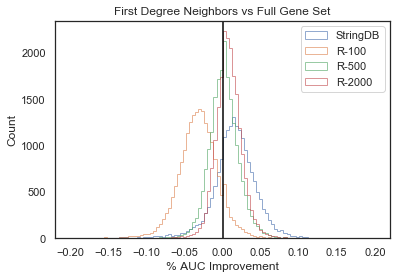

In [42]:
sns.set(style='white')
plot_hist(graphs=[all_string_diff, all_r100_diff, all_r500_diff, all_r2000_diff],
          labels=['StringDB', 'R-100', 'R-500', 'R-2000'],
          xlimits=(-0.2, 0.2),
          bins=100)